# Example of using the Borehole3D class

## Imports

In [1]:
from striplog import Component, Decor, Legend, Lexicon, Striplog
from core.omf import Borehole3D, striplog_legend_to_omf_legend 
from utils.lexicon.lexicon_memoris import lexicon_memoris, lithology_memoris, pollutant_memoris
from utils.io import boreholes_from_files, gdf_viewer
from core.core import Project
from core.orm import BoreholeOrm, PositionOrm, Base 
import random
from os import remove
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
from definitions import ROOT_DIR

/home/yanathan/.local/share/virtualenvs/GSDMA-DRfwm83x/lib/python3.8/site-packages/striplog/legend.py:687: UserWarning: This legend contains duplicate components.
  warnings.warn(w)
/home/yanathan/.local/share/virtualenvs/GSDMA-DRfwm83x/lib/python3.8/site-packages/striplog/legend.py:687: UserWarning: This legend contains duplicate components.
  warnings.warn(w)


## Reading of CSV files in a dir

In [2]:
#df = pd.read_csv('test_data_boreholes.csv', sep=',') # use english lexicon
df = pd.read_csv('test_litho_fr.csv', sep=',') # use french lexicon

## Data Checking

In [3]:
#pol = ['As', 'Ni', 'Cl', 'Hg', 'Pb', 'Zn']
pol = ['VR','VS','VI']
#df[['Pollutant', 'Concentration']] = ''
df[['Pollutant', 'Concentration']] = ''
df['Pollutant'] = df['Pollutant'].apply(lambda x: random.sample(pol, 1)[0])
df['Concentration'] = df['Concentration'].apply(lambda x: np.random.randint(0,100))
df['Unit'] = 'mg/l'

In [4]:
df['Lithology'] = df['Lithology'].replace({'Grès':'Marne', 'Calcaire':'Dolomie'})

In [5]:
df.loc[35.5, :] = ['BH007',152794.0, 121111.0, 60.0, 0.57, 45, 'Calcaire', 'Bleu', 4, 41, 45, 'Cl', 78, 'mg/l']
df.loc[25.5, :] = ['BH005',152473.0, 121460.0, 72.0, 0.61, 32, 'Schiste', 'gris', 3, 29, 32, 'Cl', 78, 'mg/l']
df.drop(index=4, inplace=True)
df.drop(columns='Colour', inplace=True)
df = df.sort_index().reset_index(drop=True)

In [6]:
gdf_viewer(df)

Rows : 996, columns : 13


interactive(children=(IntSlider(value=10, description='rows', max=996, min=10, readout=False), IntSlider(value…

## Create Boreholes from dataframes or files

In [7]:
bhs_df=[df[0:50]] # list of dataframes

In [8]:
boreholes, components, link_intv_comp = boreholes_from_files(bhs_df, verbose=False,
                                                litho_field=['Lithology', 'Pollutant'], 
                                                color_field='Colour', lexicon=lexicon_memoris, 
                                                diam_field='Diameter', thick_field='Thickness')

/home/yanathan/Projects/GSDMA/utils/io.py:469: SAWarning: relationship 'ComponentOrm.intervals' will copy column Components.id to column Linkintervalcomponent.comp_id, which conflicts with relationship(s): 'IntervalOrm.components' (copies Components.id to Linkintervalcomponent.comp_id). If this is not the intention, consider if these relationships should be linked with back_populates, or if viewonly=True should be applied to one or more if they are read-only. For the less common case that foreign key constraints are partially overlapping, the orm.foreign() annotation can be used to isolate the columns that should be written towards.   The 'overlaps' parameter may be used to remove this warning.
  boreholes.append(BoreholeOrm(id=bh_name))
/home/yanathan/Projects/GSDMA/utils/io.py:469: SAWarning: relationship 'ComponentOrm.intervals' will copy column Intervals.id to column Linkintervalcomponent.int_id, which conflicts with relationship(s): 'IntervalOrm.components' (copies Intervals.id to


Dataframe 0 processing...
|__ID:'BH001'
{'lithology': 'sable', 'pollutant': 'vi'}
{'lithology': 'argile', 'pollutant': 'vs'}
{'lithology': 'marne', 'pollutant': 'vs'}
{'lithology': 'charbon', 'pollutant': 'vi'}
Summary : [Striplog(4 Intervals, start=0.0, stop=28.0)]
|__ID:'BH002'
{'lithology': 'sable', 'pollutant': 'vi'}
{'lithology': 'argile', 'pollutant': 'vi'}
{'lithology': 'marne', 'pollutant': 'vi'}
{'lithology': 'charbon', 'pollutant': 'vi'}
{'lithology': 'dolomie', 'pollutant': 'vs'}
Summary : [Striplog(5 Intervals, start=0.0, stop=37.0)]
|__ID:'BH003'
{'lithology': 'sable', 'pollutant': 'vi'}
{'lithology': 'argile', 'pollutant': 'vi'}
{'lithology': 'marne', 'pollutant': 'vi'}
{'lithology': 'charbon', 'pollutant': 'vs'}
{'lithology': 'dolomie', 'pollutant': 'vr'}
Summary : [Striplog(5 Intervals, start=0.0, stop=18.0)]
|__ID:'BH004'
{'lithology': 'sable', 'pollutant': 'vr'}
{'lithology': 'argile', 'pollutant': 'vi'}
{'lithology': 'marne', 'pollutant': 'vs'}
{'lithology': 'charbo

In [9]:
boreholes

[<core.orm.BoreholeOrm>(Name=BH001, Length=28.0, Diameter=0.43, Intervals=4),
 <core.orm.BoreholeOrm>(Name=BH002, Length=37.0, Diameter=0.6, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH003, Length=18.0, Diameter=0.41, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH004, Length=26.0, Diameter=0.61, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH005, Length=32.0, Diameter=0.61, Intervals=6),
 <core.orm.BoreholeOrm>(Name=BH006, Length=26.0, Diameter=0.31, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH007, Length=45.0, Diameter=0.57, Intervals=6),
 <core.orm.BoreholeOrm>(Name=BH008, Length=35.0, Diameter=0.39, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH009, Length=40.0, Diameter=0.5, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH10, Length=14.0, Diameter=0.31, Intervals=4)]

In [10]:
components

{0: Component({'lithology': 'marne', 'pollutant': 'vs'}),
 1: Component({'lithology': 'charbon', 'pollutant': 'vi'}),
 2: Component({'lithology': 'sable', 'pollutant': 'vi'}),
 3: Component({'lithology': 'argile', 'pollutant': 'vs'}),
 4: Component({'lithology': 'dolomie', 'pollutant': 'vs'}),
 5: Component({'lithology': 'marne', 'pollutant': 'vi'}),
 6: Component({'lithology': 'argile', 'pollutant': 'vi'}),
 7: Component({'lithology': 'dolomie', 'pollutant': 'vr'}),
 8: Component({'lithology': 'charbon', 'pollutant': 'vs'}),
 9: Component({'lithology': 'sable', 'pollutant': 'vr'}),
 10: Component({'lithology': 'marne', 'pollutant': 'vr'}),
 11: Component({'lithology': 'argile', 'pollutant': 'vr'}),
 12: Component({'lithology': 'schiste'}),
 13: Component({'lithology': 'charbon', 'pollutant': 'vr'}),
 14: Component({'lithology': 'dolomie', 'pollutant': 'vi'}),
 15: Component({'lithology': 'calcaire'}),
 16: Component({'lithology': 'sable', 'pollutant': 'vs'})}

In [11]:
len(boreholes), len(components)

(10, 17)

## Create a project and save data in a database

In [12]:
remove('tmp_files/tfe_orm_db.db')

In [13]:
engine = create_engine('sqlite:///tmp_files/tfe_orm_db.db', echo=True)

In [14]:
Base.metadata.create_all(engine)

2021-07-01 02:42:32,485 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-07-01 02:42:32,486 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Boreholes")
2021-07-01 02:42:32,487 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-07-01 02:42:32,488 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("Boreholes")
2021-07-01 02:42:32,489 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-07-01 02:42:32,489 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Positions")
2021-07-01 02:42:32,490 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-07-01 02:42:32,491 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("Positions")
2021-07-01 02:42:32,491 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-07-01 02:42:32,492 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Intervals")
2021-07-01 02:42:32,493 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-07-01 02:42:32,494 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("Intervals")
2021-07-01 02:42:32,494 INFO sqlalchemy.engine.Engine 

In [15]:
Session = sessionmaker(bind=engine)
session = Session()

In [16]:
p = Project(session, legend_dict={'lithology':lithology_memoris, 'pollutant':pollutant_memoris}, 
            lexicon=lexicon_memoris, repr_attribute='lithology')

p.add_components(components)

2021-07-01 02:42:32,534 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-07-01 02:42:32,537 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-07-01 02:42:32,538 INFO sqlalchemy.engine.Engine [generated in 0.00087s] ()
2021-07-01 02:42:32,543 INFO sqlalchemy.engine.Engine INSERT INTO "Components" (id, description) VALUES (?, ?)
2021-07-01 02:42:32,544 INFO sqlalchemy.engine.Engine [generated in 0.00091s] ((0, 'Marne, vs'), (1, 'Charbon, vi'), (2, 'Sable, vi'), (3, 'Argile, vs'), (4, 'Dolomie, vs'), (5, 'Marne, vi'), (6, 'Argile, vi'), (7, 'Dolomie, vr')  ... displaying 10 of 17 total bound parameter sets ...  (15, 'Calcaire'), (16, 'Sable, vs'))
2021-07-01 02:42:32,545 INFO sqlalchemy.engine.Engine COMMIT
2021-07-01 02:42:32,548 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-07-01 02:42:32,549 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "B

Add boreholes into the project

In [17]:
for bh in boreholes:
    p.add_borehole(bh)

2021-07-01 02:42:32,557 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-07-01 02:42:32,558 INFO sqlalchemy.engine.Engine [generated in 0.00115s] ('BH001', 28.0, 0.43)
2021-07-01 02:42:32,560 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-07-01 02:42:32,561 INFO sqlalchemy.engine.Engine [generated in 0.00081s] ((0, 101.0, 101.0, 101.0, 152600.0, 121039.0), (1, 97.0, 97.0, 97.0, 152600.0, 121039.0), (2, 97.0, 97.0, 97.0, 152600.0, 121039.0), (3, 93.0, 93.0, 93.0, 152600.0, 121039.0), (4, 93.0, 93.0, 93.0, 152600.0, 121039.0), (5, 81.0, 81.0, 81.0, 152600.0, 121039.0), (6, 81.0, 81.0, 81.0, 152600.0, 121039.0), (7, 73.0, 73.0, 73.0, 152600.0, 121039.0))
2021-07-01 02:42:32,563 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-07-01 02:42:32,564 INFO sqlalchemy.engine.Engine

2021-07-01 02:42:32,633 INFO sqlalchemy.engine.Engine [cached since 0.04964s ago] (9,)
2021-07-01 02:42:32,635 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-07-01 02:42:32,636 INFO sqlalchemy.engine.Engine [cached since 0.05515s ago] (10,)
2021-07-01 02:42:32,637 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-07-01 02:42:32,638 INFO sqlalchemy.engine.Engine [cached since 0.05436s ago] (11,)
2021-07-01 02:42:32,640 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions

2021-07-01 02:42:32,696 INFO sqlalchemy.engine.Engine [cached since 0.1128s ago] (23,)
2021-07-01 02:42:32,698 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-07-01 02:42:32,699 INFO sqlalchemy.engine.Engine [cached since 0.1183s ago] (24,)
2021-07-01 02:42:32,700 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-07-01 02:42:32,700 INFO sqlalchemy.engine.Engine [cached since 0.117s ago] (25,)
2021-07-01 02:42:32,702 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id

2021-07-01 02:42:32,764 INFO sqlalchemy.engine.Engine UPDATE "Boreholes" SET length=? WHERE "Boreholes".id = ?
2021-07-01 02:42:32,765 INFO sqlalchemy.engine.Engine [cached since 0.1561s ago] (96.0, 'BH004')
2021-07-01 02:42:32,767 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-07-01 02:42:32,767 INFO sqlalchemy.engine.Engine [cached since 0.2109s ago] ('BH005', 32.0, 0.61)
2021-07-01 02:42:32,769 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-07-01 02:42:32,769 INFO sqlalchemy.engine.Engine [cached since 0.2093s ago] ((38, 101.0, 101.0, 101.0, 152473.0, 121460.0), (39, 97.0, 97.0, 97.0, 152473.0, 121460.0), (40, 97.0, 97.0, 97.0, 152473.0, 121460.0), (41, 93.0, 93.0, 93.0, 152473.0, 121460.0), (42, 93.0, 93.0, 93.0, 152473.0, 121460.0), (43, 82.0, 82.0, 82.0, 152473.0, 121460.0), (44, 82.0, 82.0, 82.0, 152473.0, 121460.0), (45, 74.0, 74.0, 74.0, 152473.0, 121460.0

2021-07-01 02:42:32,826 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id) VALUES (?, ?, ?, ?, ?, ?)
2021-07-01 02:42:32,827 INFO sqlalchemy.engine.Engine [cached since 0.2634s ago] ((25, 'BH006', 0, 'Sable VR', 50, 51), (26, 'BH006', 1, 'Argile VI', 52, 53), (27, 'BH006', 2, 'Marne VR', 54, 55), (28, 'BH006', 3, 'Charbon VR', 56, 57), (29, 'BH006', 4, 'Dolomie VR', 58, 59))
2021-07-01 02:42:32,828 INFO sqlalchemy.engine.Engine COMMIT
2021-07-01 02:42:32,832 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-07-01 02:42:32,833 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-07-01 02:42:32,833 INFO sqlalchemy.engine.Engine [cached since 0.2964s ago] ()
2021-07-01 02:42:32,835 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", 

2021-07-01 02:42:32,890 INFO sqlalchemy.engine.Engine [cached since 0.3094s ago] (60,)
2021-07-01 02:42:32,892 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-07-01 02:42:32,893 INFO sqlalchemy.engine.Engine [cached since 0.3095s ago] (61,)
2021-07-01 02:42:32,896 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-07-01 02:42:32,897 INFO sqlalchemy.engine.Engine [cached since 0.3163s ago] (62,)
2021-07-01 02:42:32,899 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_i

2021-07-01 02:42:32,961 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-07-01 02:42:32,961 INFO sqlalchemy.engine.Engine [cached since 0.3777s ago] (75,)
2021-07-01 02:42:32,963 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-07-01 02:42:32,964 INFO sqlalchemy.engine.Engine [cached since 0.3835s ago] (76,)
2021-07-01 02:42:32,966 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "

2021-07-01 02:42:33,033 INFO sqlalchemy.engine.Engine [cached since 0.4491s ago] (89,)
2021-07-01 02:42:33,034 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-07-01 02:42:33,035 INFO sqlalchemy.engine.Engine [cached since 0.4547s ago] (90,)
2021-07-01 02:42:33,037 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-07-01 02:42:33,038 INFO sqlalchemy.engine.Engine [cached since 0.4543s ago] (91,)
2021-07-01 02:42:33,050 INFO sqlalchemy.engine.Engine UPDATE "Boreholes" SET length=? WHERE

In [18]:
p.add_link_between_components_and_intervals(link_intv_comp)

2021-07-01 02:42:33,110 INFO sqlalchemy.engine.Engine UPDATE "Boreholes" SET length=? WHERE "Boreholes".id = ?
2021-07-01 02:42:33,111 INFO sqlalchemy.engine.Engine [cached since 0.5018s ago] (95.0, 'BH10')
2021-07-01 02:42:33,115 INFO sqlalchemy.engine.Engine INSERT INTO "Linkintervalcomponent" (int_id, comp_id, extra_data) VALUES (?, ?, ?)
2021-07-01 02:42:33,116 INFO sqlalchemy.engine.Engine [generated in 0.00127s] ((0, 2, ''), (1, 3, ''), (2, 0, ''), (3, 1, ''), (4, 2, ''), (5, 6, ''), (6, 5, ''), (7, 1, '')  ... displaying 10 of 50 total bound parameter sets ...  (48, 10, ''), (49, 13, ''))
2021-07-01 02:42:33,119 INFO sqlalchemy.engine.Engine COMMIT
2021-07-01 02:42:33,122 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-07-01 02:42:33,123 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-07-01 02:42:33,124 INFO sqlalchemy.engine.Engine [cached sin

In [19]:
p.commit()
print('Boreholes in the project : ', len(p.boreholes))

2021-07-01 02:42:33,129 INFO sqlalchemy.engine.Engine COMMIT
Boreholes in the project :  10


In [20]:
p.boreholes

2021-07-01 02:42:33,138 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-07-01 02:42:33,140 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-07-01 02:42:33,142 INFO sqlalchemy.engine.Engine [generated in 0.00117s] ('BH001',)
2021-07-01 02:42:33,144 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-07-01 02:42:33,144 INFO sqlalchemy.engine.Engine [cached since 0.5697s ago] ('BH001',)
2021-07-01 02:42:33,146 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length

[<core.orm.BoreholeOrm>(Name=BH001, Length=97.0, Diameter=0.43, Intervals=4),
 <core.orm.BoreholeOrm>(Name=BH002, Length=98.0, Diameter=0.6, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH003, Length=100.0, Diameter=0.41, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH004, Length=96.0, Diameter=0.61, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH005, Length=97.0, Diameter=0.61, Intervals=6),
 <core.orm.BoreholeOrm>(Name=BH006, Length=100.0, Diameter=0.31, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH007, Length=97.0, Diameter=0.57, Intervals=6),
 <core.orm.BoreholeOrm>(Name=BH008, Length=98.0, Diameter=0.39, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH009, Length=94.0, Diameter=0.5, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH10, Length=95.0, Diameter=0.31, Intervals=4)]

In [21]:
p.refresh(verbose=False)

2021-07-01 02:42:33,205 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-07-01 02:42:33,206 INFO sqlalchemy.engine.Engine [cached since 0.6692s ago] ()


In [22]:
session.close()

2021-07-01 02:42:33,212 INFO sqlalchemy.engine.Engine ROLLBACK


# 2D/3D Display

In [23]:
p.legend_dict.keys() #['pollutant']

dict_keys(['lithology', 'pollutant'])

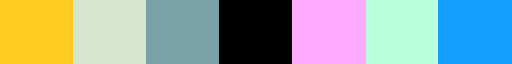

In [24]:
p.update_legend_cmap(update_legend=True)[1]

## Display one object (attribute = 'lithology')

In [25]:
bh = 1
p.boreholes_3d[bh]._components

[Component({'lithology': 'sable', 'pollutant': 'vi'}),
 Component({'lithology': 'argile', 'pollutant': 'vi'}),
 Component({'lithology': 'marne', 'pollutant': 'vi'}),
 Component({'lithology': 'charbon', 'pollutant': 'vi'}),
 Component({'lithology': 'dolomie', 'pollutant': 'vs'})]

/home/yanathan/.local/share/virtualenvs/GSDMA-DRfwm83x/lib/python3.8/site-packages/striplog/striplog.py:1505: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "'". Passing invalid values is deprecated since 3.4 and will become an error two minor releases later.
  rect = mpl.patches.Rectangle(origin,
/home/yanathan/.local/share/virtualenvs/GSDMA-DRfwm83x/lib/python3.8/site-packages/striplog/legend.py:311: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "'". Passing invalid values is deprecated since 3.4 and will become an error two minor releases later.
  rect1 = patches.Rectangle((0, 0),


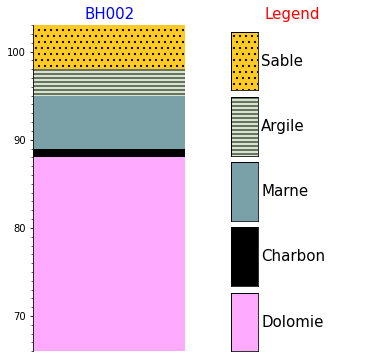

In [26]:
p.boreholes_3d[bh].plot2d()

In [27]:
bh=1
p.boreholes_3d[bh].plot3d(show_legend=False)#, scalar_bar_args=sargs)

Colormap computing ...
{1.4: 'sable', 2.2: 'argile', 3.0: 'marne', 3.8000000000000003: 'charbon', 4.6: 'dolomie'}


ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

## Plot with another attribute

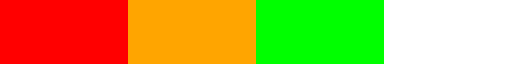

In [28]:
p.update_legend_cmap(repr_attribute='pollutant')[1] #legend=lithology_memoris, update_legend=False)[0]

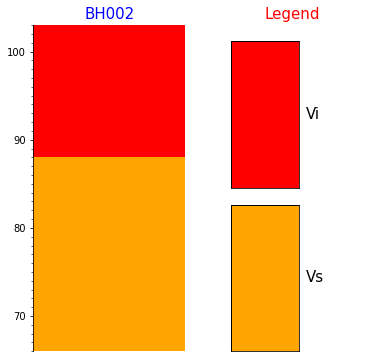

In [29]:
p.boreholes_3d[bh].plot2d(repr_attribute='pollutant', repr_legend=pollutant_memoris)

In [31]:
p.boreholes_3d[bh].plot3d(repr_attribute='pollutant', 
                          repr_legend=pollutant_memoris, 
                          show_legend=True)

Colormap computing ...
{1.4: 'vi', 2.2: 'vs'}


ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

### Display project boreholes

### Boreholes in 3D using X3D for interaction within the notebook